<h1>Деревья решений и метод ближайших соседей в задаче распознавания рукописных цифр MNIST</h1>

Теперь посмотрим на описанные 2 алгоритма в реальной задаче. Используемый "встроенные" в sklearn данные по рукописным цифрам. Эта задача будет примером, когда метод ближайших соседей работает на удивление хорошо.

In [1]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split, StratifiedKFold

In [2]:
digits = load_digits()

In [6]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

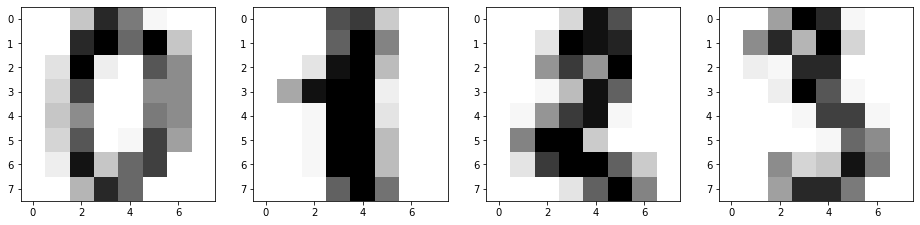

In [11]:
from matplotlib import pyplot as plt

pic_box = plt.figure(figsize=(16,4))
for i in range(4):
    pic_box.add_subplot(1,4,i+1)
    plt.imshow(digits.images[i], cmap='Greys')

In [12]:
X = digits.data
y = digits.target

In [22]:
X_train, X_holdout, y_train, y_holdout = train_test_split(X, y, test_size=0.3,
                                                          random_state=17)

In [25]:
%%time

from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth=5, random_state=17)
clf.fit(X_train, y_train)
clf_pred = clf.predict(X_holdout)

Wall time: 10 ms


In [26]:
%%time

from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=10)
neigh.fit(X_train, y_train)
neigh_pred = neigh.predict(X_holdout)

Wall time: 32 ms


Сделаем прогнозы для отложенной выборки. Видим, что метод ближайших соседей справился намного лучше. Но это мы пока выбирали параметры наугад.

In [33]:
from sklearn.metrics import accuracy_score

print("""{} DecisionTreeClassifier
{} KNeighborsClassifier""".format(accuracy_score(y_holdout, clf_pred), accuracy_score(y_holdout, neigh_pred)))

0.6666666666666666 DecisionTreeClassifier
0.9740740740740741 KNeighborsClassifier


In [35]:
tree_params = {"max_depth": [1, 2, 3, 5, 10, 20, 25, 30, 40, 50, 64],
               "max_features": [1, 2, 3, 5, 10, 20, 30, 50, 64]}

In [36]:
from sklearn.model_selection import GridSearchCV, cross_val_score

In [37]:
tree_grid = GridSearchCV(clf, tree_params, cv=5, n_jobs=-1, verbose=True)

In [38]:
tree_grid.fit(X_train, y_train)

Fitting 5 folds for each of 99 candidates, totalling 495 fits


GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(max_depth=5, random_state=17),
             n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 5, 10, 20, 25, 30, 40, 50, 64],
                         'max_features': [1, 2, 3, 5, 10, 20, 30, 50, 64]},
             verbose=True)

Лучшее сочетание параметров и соответствующая средняя доля правильных ответов на кросс-валидации:

In [39]:
tree_grid.best_params_, tree_grid.best_score_

({'max_depth': 10, 'max_features': 50}, 0.8568203376968316)

In [40]:
accuracy_score(y_holdout, tree_grid.predict(X_holdout))

0.8425925925925926

In [41]:
cross_val_score(KNeighborsClassifier(n_neighbors=1), X_train, y_train, cv=5)

array([0.97222222, 0.98809524, 0.99203187, 0.99203187, 0.98804781])

In [42]:
import numpy as np

np.mean(cross_val_score(KNeighborsClassifier(n_neighbors=1), X_train, y_train, cv=5))

0.9864858028204642

In [43]:
knn = KNeighborsClassifier(n_neighbors=1).fit(X_train, y_train)
accuracy_score(y_holdout, knn.predict(X_holdout))

0.9833333333333333

<h1>Вывод по этому эксперименту (и общий совет):
    
в начале проверяйте на своих данных простые модели – дерево решений и метод ближайших соседей (а в следующий раз сюда добавится логистическая регрессия), может оказаться, что уже они работают достаточно хорошо.